In [1]:
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [2]:
import os
from PIL import Image
import numpy as np

In [3]:
import cv2

In [4]:
LOCATION = '../humans_of_paris/app/static/images/'
pictures = os.listdir(LOCATION)

In [5]:
model = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
f = []
for pic in pictures:
    if '.' != pic[0]:
        image = Image.open(LOCATION + pic)
        img = np.array(image)
        faces = model.detect_faces(img)
        f.append(faces)

In [8]:
for index, i in enumerate(f):
    if len(i) == 0:
        i.append({'source': pictures[index]})
    i[0]['source']= pictures[index]

In [9]:
f2 = [i[0] for i in f]

In [10]:
import pandas as pd

In [11]:
df_faces = pd.DataFrame(f2)

In [13]:
df_faces.confidence.plot('hist', bins=100)

/Users/lguillain/opt/anaconda3/envs/fdh/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


In [14]:
len(df_faces[df_faces.box.isna()].source)

59

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

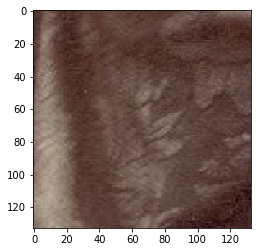

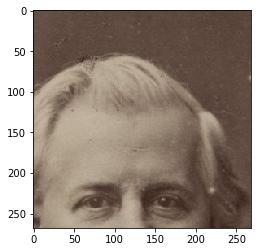

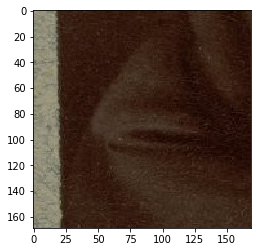

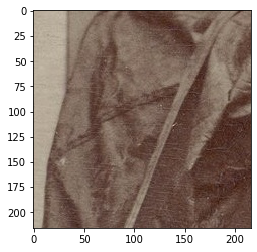

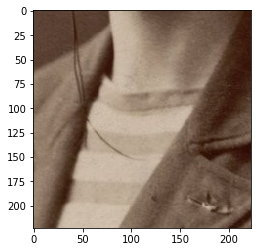

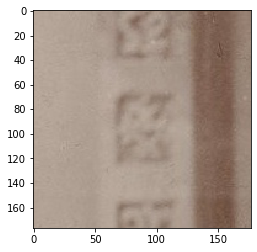

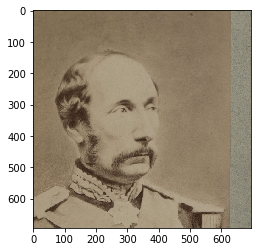

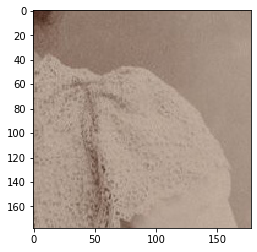

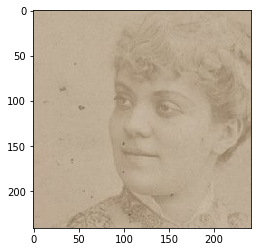

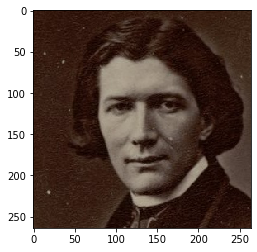

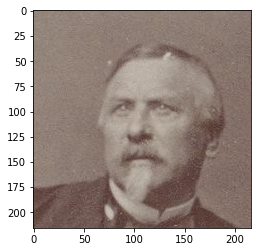

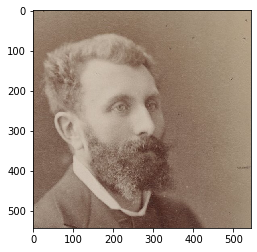

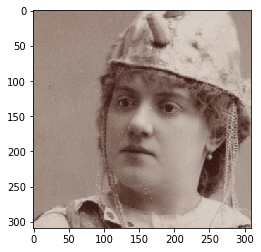

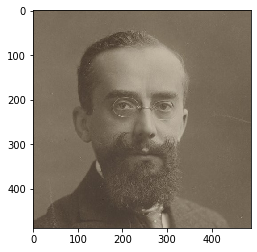

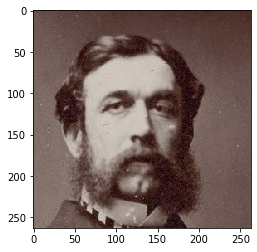

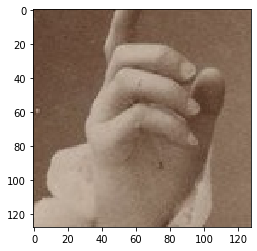

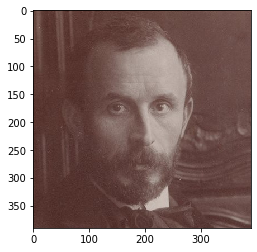

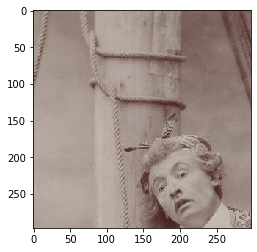

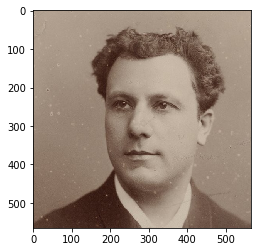

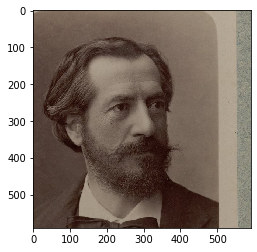

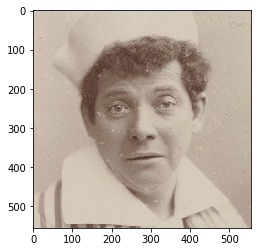

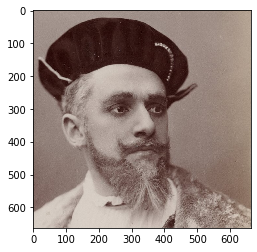

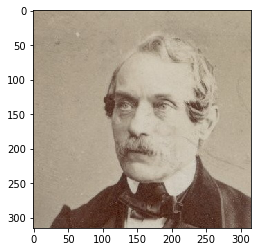

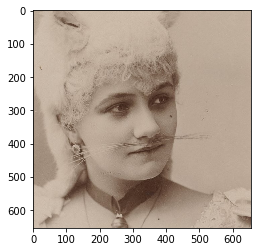

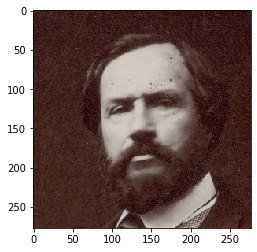

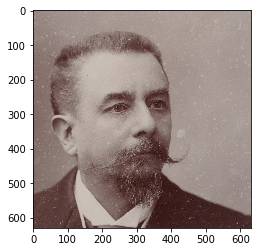

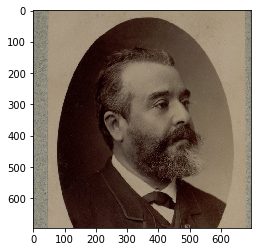

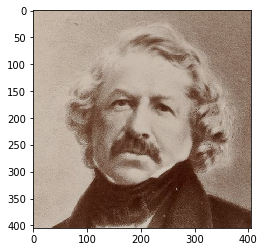

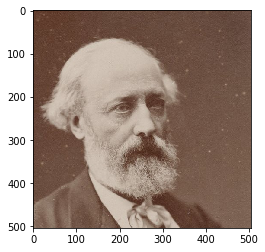

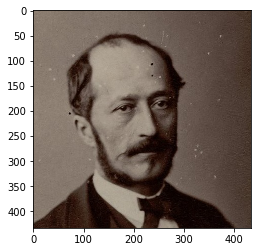

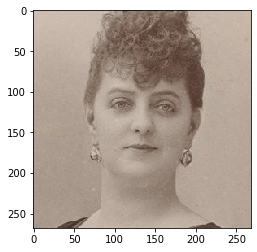

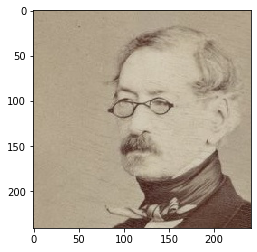

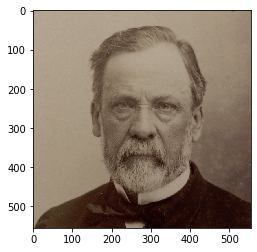

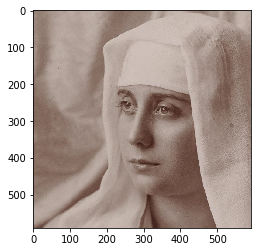

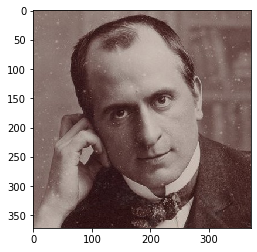

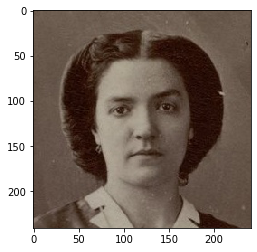

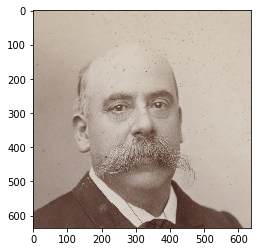

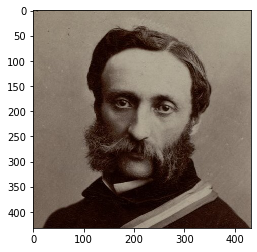

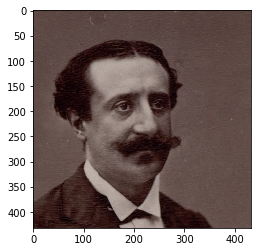

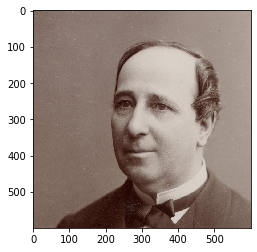

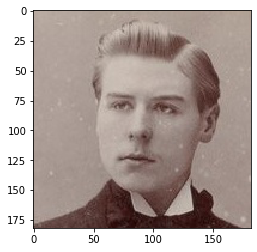

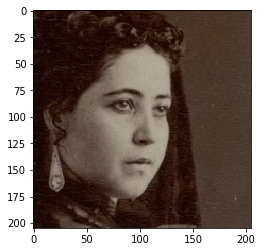

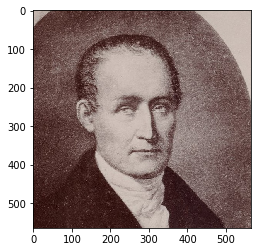

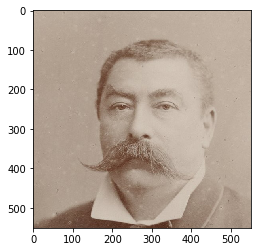

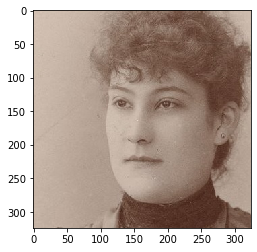

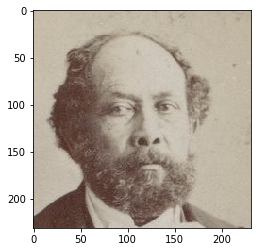

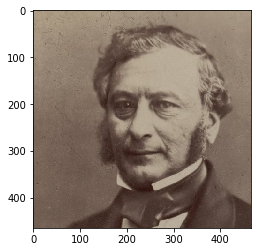

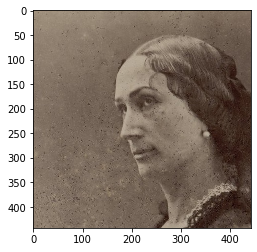

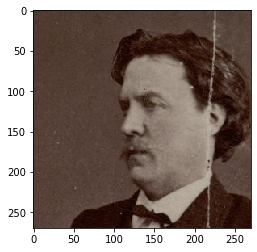

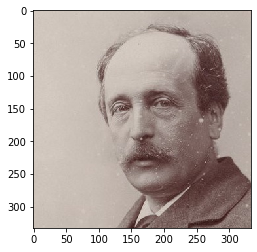

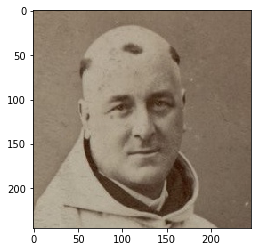

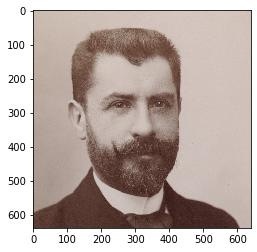

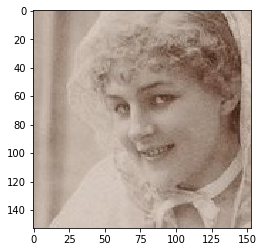

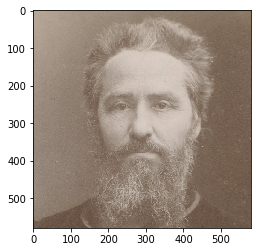

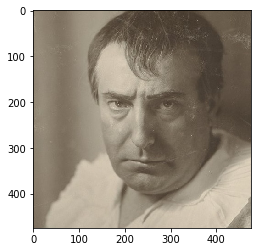

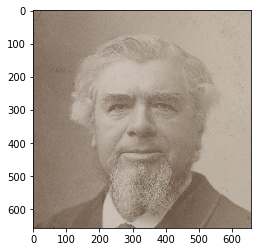

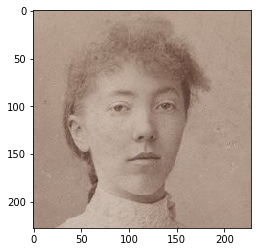

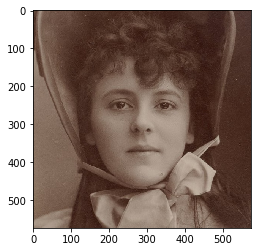

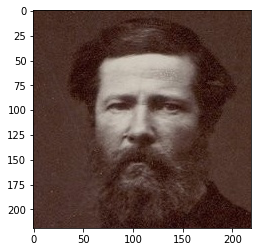

In [17]:
for pic in df_faces[df_faces.box.isna()].source.tolist():
    image = Image.open(LOCATION + pic)
    img = np.array(image)
    plt.imshow(img)
    plt.show()

In [18]:
import requests 
from io import BytesIO

def get_face_image(doc):
    output_file = '../humans_of_paris/app/static/images/'+doc
    print(output_file)
    img = get_image(doc)
    faces = model.detect_faces(img)
    if len(faces) > 0:
        print(faces[0]['confidence'])
        minx, miny, maxx, maxy = faces[0]['box']
    else:
        print(faces)
        return
    cropped = crop(img, minx-40, miny-40, minx+maxx+40, miny+maxy+40)
    plt.imshow(cropped)
    plt.show()
    cv2.imwrite(output_file,  cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))
    
def get_image(doc):
    url = 'https://gallica.bnf.fr/ark:/12148/'+doc[:-len('.png')]+'/f1.highres.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = np.array(img)
    return img

def crop(img, minx, miny, maxx, maxy):
    return img[miny:maxy, minx:maxx]

In [19]:
img = get_image('btv1b530660792.jpg')

../humans_of_paris/app/static/images/btv1b530503321.jpg
0.9999786615371704


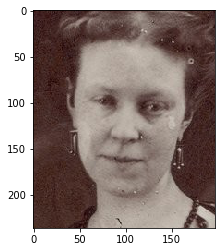

../humans_of_paris/app/static/images/btv1b53081569f.jpg
0.9999226331710815


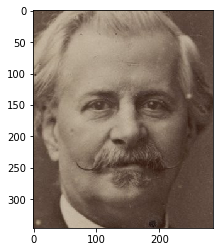

../humans_of_paris/app/static/images/btv1b530659097.jpg
0.9995711445808411


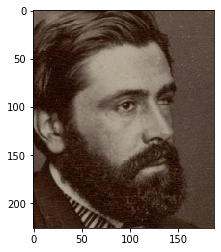

../humans_of_paris/app/static/images/btv1b53050893v.jpg
0.9999943971633911


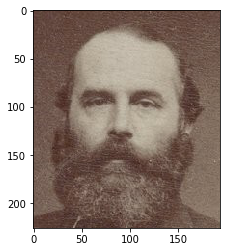

../humans_of_paris/app/static/images/btv1b530803018.jpg
0.9998552799224854


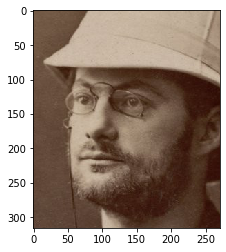

../humans_of_paris/app/static/images/btv1b53107865n.jpg
0.9890137314796448


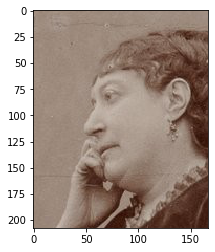

../humans_of_paris/app/static/images/btv1b53100728j.jpg
0.9734497666358948


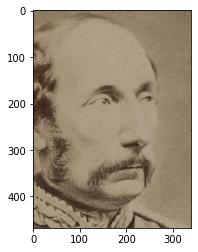

../humans_of_paris/app/static/images/btv1b531690208.jpg
0.9973297119140625


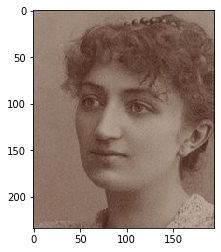

../humans_of_paris/app/static/images/btv1b531390941.jpg
[]
../humans_of_paris/app/static/images/btv1b53065822j.jpg
0.9998337030410767


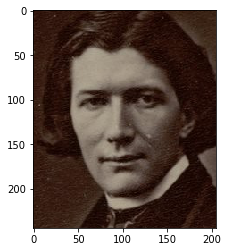

../humans_of_paris/app/static/images/btv1b530506666.jpg
0.9989708662033081


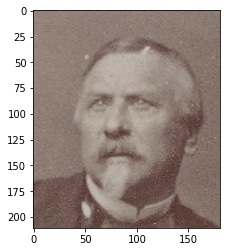

../humans_of_paris/app/static/images/btv1b531392349.jpg
0.9982017278671265


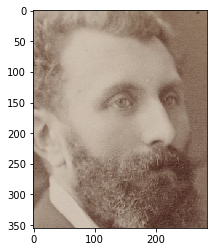

../humans_of_paris/app/static/images/btv1b53126899z.jpg
0.9999686479568481


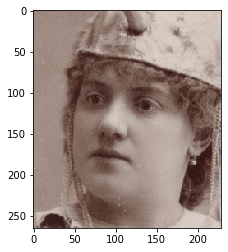

../humans_of_paris/app/static/images/btv1b53120306x.jpg
0.9990216493606567


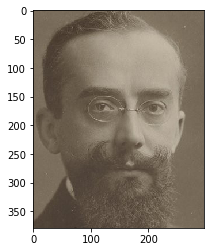

../humans_of_paris/app/static/images/btv1b53050683p.jpg
0.9997226595878601


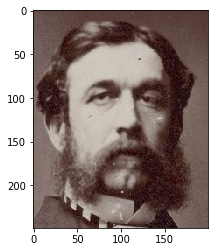

../humans_of_paris/app/static/images/btv1b53156013v.jpg
0.998819887638092


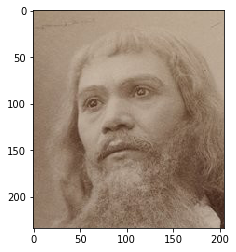

../humans_of_paris/app/static/images/btv1b53118812w.jpg
0.9994713664054871


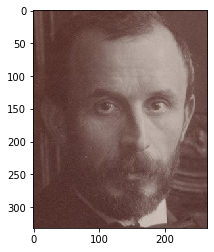

../humans_of_paris/app/static/images/btv1b53113907c.jpg
0.9954817295074463


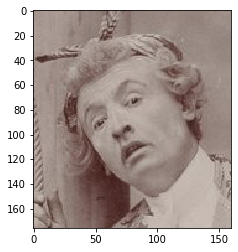

../humans_of_paris/app/static/images/btv1b53134250m.jpg
0.9992948770523071


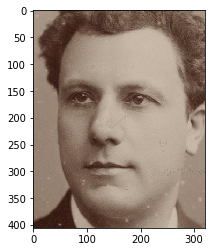

../humans_of_paris/app/static/images/btv1b530978420.jpg
0.999763548374176


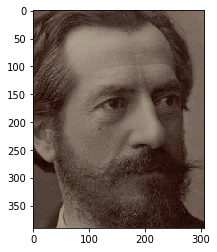

../humans_of_paris/app/static/images/btv1b53137775m.jpg
0.9994866847991943


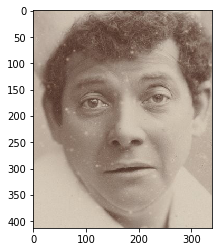

../humans_of_paris/app/static/images/btv1b53127014q.jpg
0.9998980760574341


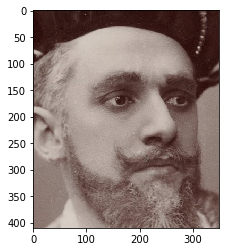

../humans_of_paris/app/static/images/btv1b53050565c.jpg
0.9998779296875


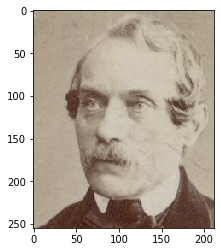

../humans_of_paris/app/static/images/btv1b53157507g.jpg
0.9993066787719727


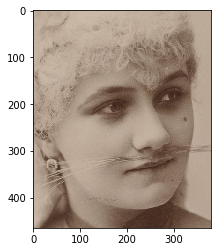

../humans_of_paris/app/static/images/btv1b530507241.jpg
0.9999523162841797


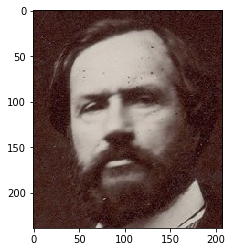

../humans_of_paris/app/static/images/btv1b53117343b.jpg
0.9999179840087891


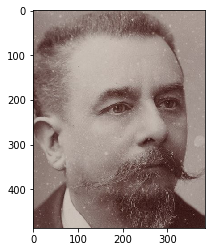

../humans_of_paris/app/static/images/btv1b53097724p.jpg
0.9998339414596558


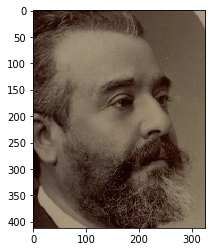

../humans_of_paris/app/static/images/btv1b531079115.jpg
0.999789297580719


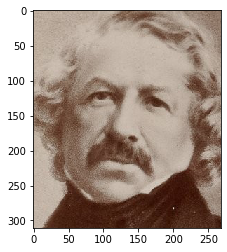

../humans_of_paris/app/static/images/btv1b531445180.jpg
0.9992853999137878


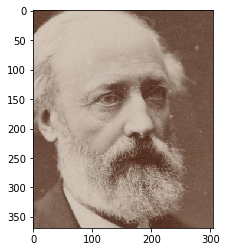

../humans_of_paris/app/static/images/btv1b530663957.jpg
0.9995104074478149


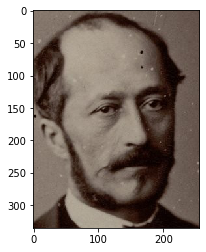

../humans_of_paris/app/static/images/btv1b531543692.jpg
0.9996623992919922


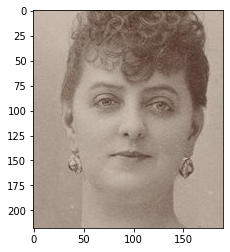

../humans_of_paris/app/static/images/btv1b53050421j.jpg
0.9949061870574951


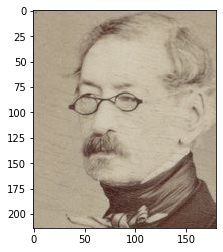

../humans_of_paris/app/static/images/btv1b53097697j.jpg
0.9945308566093445


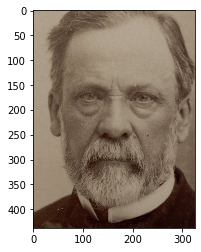

../humans_of_paris/app/static/images/btv1b53181375k.jpg
0.9992244243621826


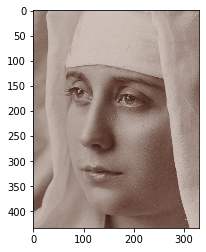

../humans_of_paris/app/static/images/btv1b53117553h.jpg
0.9997088313102722


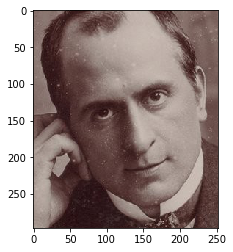

../humans_of_paris/app/static/images/btv1b53066461k.jpg
0.9997844099998474


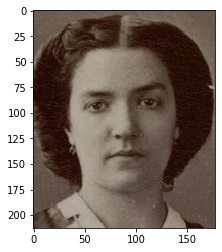

../humans_of_paris/app/static/images/btv1b53149672w.jpg
0.9985893368721008


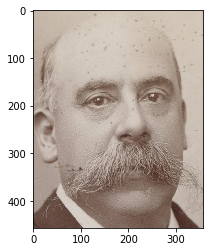

../humans_of_paris/app/static/images/btv1b53065599f.jpg
0.9994900226593018


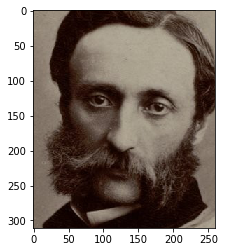

../humans_of_paris/app/static/images/btv1b53066495m.jpg
0.9954236149787903


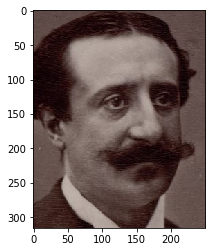

../humans_of_paris/app/static/images/btv1b531239406.jpg
0.999514102935791


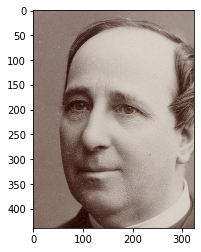

../humans_of_paris/app/static/images/btv1b531174964.jpg
0.9999878406524658


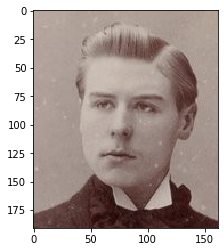

../humans_of_paris/app/static/images/btv1b530663114.jpg
0.9999818801879883


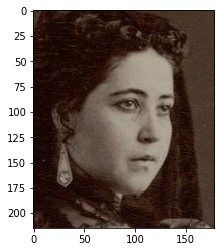

../humans_of_paris/app/static/images/btv1b53118972r.jpg
0.999230146408081


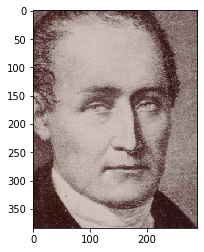

../humans_of_paris/app/static/images/btv1b53144863z.jpg
0.9989261031150818


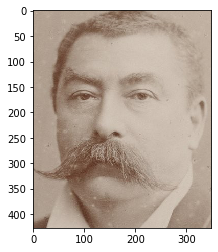

../humans_of_paris/app/static/images/btv1b53163749q.jpg
0.9981675148010254


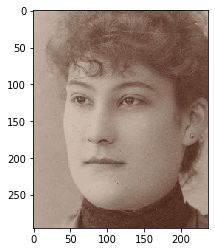

../humans_of_paris/app/static/images/btv1b530503897.jpg
0.999640703201294


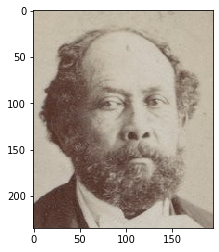

../humans_of_paris/app/static/images/btv1b531044223.jpg
0.9974768757820129


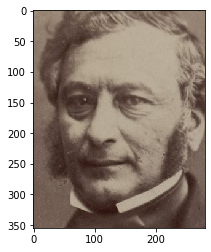

../humans_of_paris/app/static/images/btv1b53104480p.jpg
0.9868349432945251


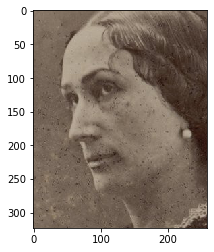

../humans_of_paris/app/static/images/btv1b53066297r.jpg
0.9995121955871582


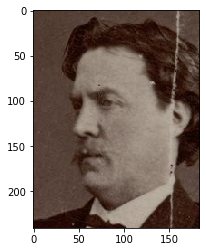

../humans_of_paris/app/static/images/btv1b53117425s.jpg
0.9999837875366211


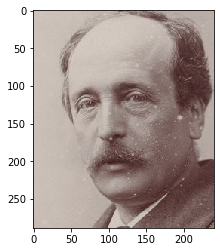

../humans_of_paris/app/static/images/btv1b530654812.jpg
0.9991195797920227


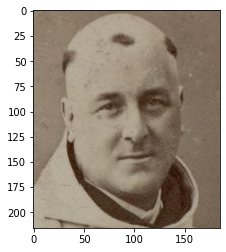

../humans_of_paris/app/static/images/btv1b53181166v.jpg
0.9999606609344482


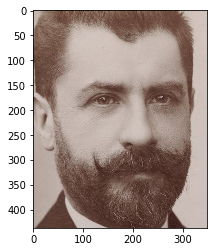

../humans_of_paris/app/static/images/btv1b53107831m.jpg
0.988105058670044


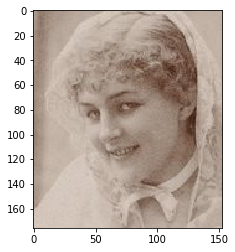

../humans_of_paris/app/static/images/btv1b531487110.jpg
0.9996306896209717


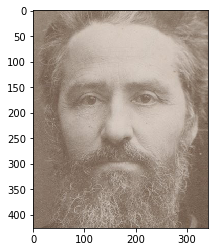

../humans_of_paris/app/static/images/btv1b53120283h.jpg
0.9896703362464905


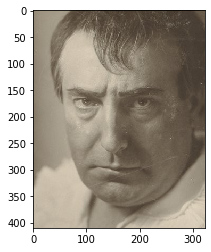

../humans_of_paris/app/static/images/btv1b53152129z.jpg
0.9999936819076538


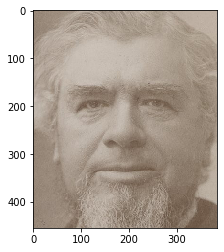

../humans_of_paris/app/static/images/btv1b53187945p.jpg
0.997563362121582


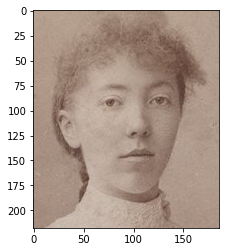

../humans_of_paris/app/static/images/btv1b53161922t.jpg
0.9999568462371826


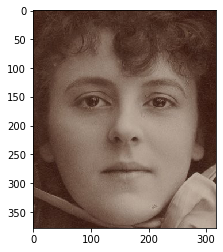

../humans_of_paris/app/static/images/btv1b53050852r.jpg
0.9980698227882385


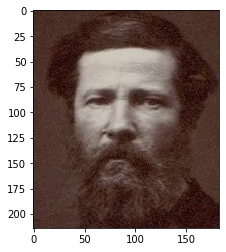

In [20]:
for source in df_faces[df_faces.box.isna()].source.tolist():
    get_face_image(source)